<h2> Universally Used Functions

Generate Data Function

In [1]:
import random
import time
import pandas as pd

random.seed(time.time())

def generateData(size, dimension=2, linearly_separable=True, min_dist_btwn_points=10):
    data = [[0 for x in range(dimension)] for y in range(size)] 
    
    # Initialize points and their values
    for i in range(size):

        #Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)

        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            #do it again, we don't want it too close to the line
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)

        # Point's position relative to x = y line determines value        
        if (data[i][0] >=  data[i][1]):
            data[i].append(1)
        else:
            data[i].append(-1)

        # unless we don't want it to be specifically linearly separable
        # then 10% of the time switch the value up
        if (not linearly_separable and random.randint(1,10) % 10):
            data[i][2] *= -1

    return data

In [2]:
def sep_data(data):
    #separate the points from values for sake of pla
    values=[]
    points=[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
    return [points, values]

Plot Data Function

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plotData(data, graph_title, weights=[]):
    
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    if weights:
        x = np.array(range(100))
        y = (-1*weights[0]) - weights[1]*x / weights[2]
        plt.plot(x, y) 

PLA Algorithm

In [4]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    labels_this_run = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if labels_this_run[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

In [5]:
import numpy as np
def pla(x, y, passes,step_size, miss_threshold=0, w=[0,0,0]):
    
    num_missed_points = len(x) #assume it starts with them all missclassified
    reached_threshold=False
    
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0:
                update = [step_size * y[i] * point for point in x[i]]
                w = [sum(i) for i in zip(*[w,update])] #returns a vector of the sums of corresponding values in each vector (w and update) 
                updated = True
                
                #check for the number of misclassified points and return if it has less than the threshold
                if num_missclassified_points(w, x, y) < num_missed_points:
                    num_missed_points = num_missclassified_points(w, x, y)
                    #print(num_missed_points)
                    if num_missed_points <= miss_threshold:
                        reached_threshold = True
                        break
        
        if not updated:
            break
        if reached_threshold:
            break
    
    if not updated:
        print("First solution found.")
    elif reached_threshold:
        print("Best solution found for this dataset.")
    else:
        print("No solution or first solution found but not verified in the last pass.")
    return w
                    

<h2>Linearly Separable Data Set

Generate Training Data

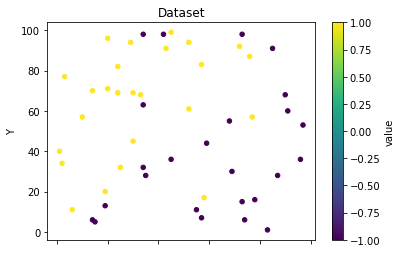

In [6]:
data = generateData(50, linearly_separable=False, min_dist_btwn_points=0)

plotData(data, "Dataset")

Run PLA algorithm on Training Data

Best solution found for this dataset.


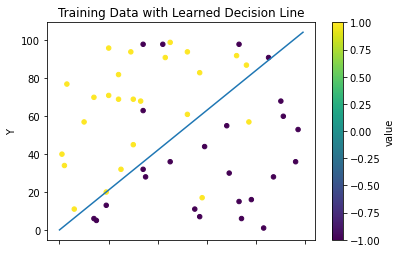

In [11]:
points = sep_data(data)[0]
values = sep_data(data)[1]
result = pla(points, values, 100, 1, miss_threshold=10)

plotData(data, 'Training Data with Learned Decision Line', result)

Generate Test Data and Plot

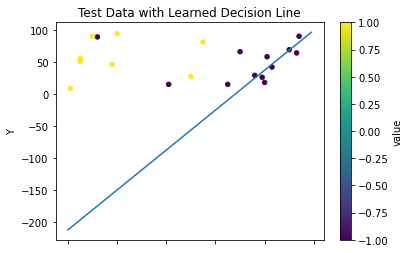

In [8]:
testData = generateData(20, linearly_separable=False, min_dist_btwn_points=0)

plotData(testData, 'Test Data with Learned Decision Line', result)